In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [7]:
df=pd.read_csv(r"/Users/vidushigupta/Desktop/Vidushi/COVID dataset/clean_data.csv")
df.head()

,Unnamed: 0,States,March,April,May
0,0,AN,10,23,0
1,1,AP,44,1359,2168
2,2,AR,0,1,3
3,3,AS,1,42,1297
4,4,BR,21,404,3382


In [8]:
df.columns

Index(['Unnamed: 0', 'States', 'March', 'April', 'May'], dtype='object')

In [9]:
df=df[['States','March','April','May']]
df.head()

,States,March,April,May
0,AN,10,23,0
1,AP,44,1359,2168
2,AR,0,1,3
3,AS,1,42,1297
4,BR,21,404,3382


In [10]:
nsv=pd.read_csv(r"/Users/vidushigupta/Desktop/Vidushi/COVID dataset/net_state_value_added_17-18.csv")
nsv.head()

,Year,2017-18
0,Maharashtra,1850758
1,Tamil Nadu,1146936
2,Uttar Pradesh,1120206
3,Karnataka,1065018
4,West Bengal,869455


In [11]:
df_nsv=nsv.iloc[[0,1,9]]

In [12]:
df_state=df.iloc[[20,30,9]]

In [13]:
df_nsv.reset_index(level=0, inplace=True)
df_nsv.drop('index', axis=1, inplace=True)
df_nsv

,Year,2017-18
0,Maharashtra,1850758
1,Tamil Nadu,1146936
2,Delhi,531646


In [14]:
df_state.reset_index(level=0, inplace=True)
df_state.drop('index', axis=1, inplace=True)
df_state

,States,March,April,May
0,MH,302,10196,57157
1,TN,124,2199,20010
2,DL,120,3395,16329


In [15]:
merged_nsv = df_nsv.join(df_state)
merged_nsv.head()

,Year,2017-18,States,March,April,May
0,Maharashtra,1850758,MH,302,10196,57157
1,Tamil Nadu,1146936,TN,124,2199,20010
2,Delhi,531646,DL,120,3395,16329


In [16]:
merged_nsv['Confirmed_Mar+Apr+May']=merged_nsv['March']+merged_nsv['April']+merged_nsv['May']
merged_nsv

,Year,2017-18,States,March,April,May,Confirmed_Mar+Apr+May
0,Maharashtra,1850758,MH,302,10196,57157,67655
1,Tamil Nadu,1146936,TN,124,2199,20010,22333
2,Delhi,531646,DL,120,3395,16329,19844


Visualizing the comparison

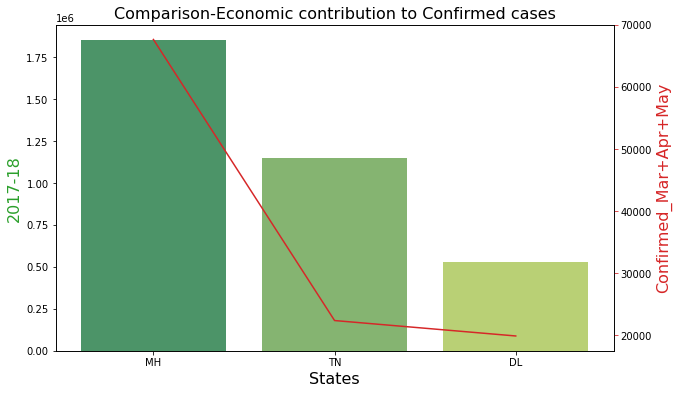

In [20]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Comparison-Economic contribution to Confirmed cases', fontsize=16)
ax1.set_xlabel('State_code', fontsize=16)
ax1.set_ylabel('Net_Value_Added(2017-18)', fontsize=16, color=color)
ax2 = sns.barplot(x='States', y='2017-18', data = merged_nsv, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Confirmed_Mar+Apr+May', fontsize=16, color=color)
ax2 = sns.lineplot(x='States', y='Confirmed_Mar+Apr+May', data = merged_nsv, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()